concentration initiale dans la riviere suite à l'accident : 8.0 µg/L
hyp rho_MES = 2 kg.L-1 --> fraction particulaire du Benzène = 2.91E+00 %
constante de sédimentation du Benzène :    2.9E-02 j-1
temp de vie par sédimentation du Benzène : 3.4E+01 j
HRT pour le Benzène, à 25°C :                           6201
HRT pour le Benzène, à la température de la rivière : 11781
vitesse d'évaporation du Benzène : 2.1e-02 m.s-1
vitesse d'évaporation du Benzène : 1.8e+03 m.j-1
constante d'évaporation du Benzène : 8.9e+02 j-1
temps de vie du benzène par évaporation : 1.1e-03 j


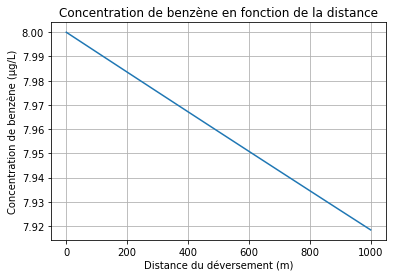

In [3]:
import math
import matplotlib.pyplot as plt

# physique de la rivière
x0 = 1  # km, distance de SchweitzerHalle à Lobith
u = 1  # m/s, vitesse moyenne de l'écoulement
h = 2  # m, profondeur moyenne du Rhin
Q = 50  # m3/s, débit dans le Drac
C_MES = 1E-2  # kg/l, concentration en matières en suspension
M_HAP = 2  # Kg
v_sed = 2  # m/j, vitesse de sédimentation des particules
v_air_H2O = 5E-3  # m/s vitesse de transfert dans l'air
v_eau_O2 = 2E-5  # m/s vitesse de transfert dans l'eau
Tw = 10  # °C température de l'eau
pH = 7.9

# caractéristique Benzène
Koc = 60  # coefficient de partage carbone organique/eau
foc = 0.1  # constante de partition MES
Kom = foc * Koc  # constante de partition eau - matière en suspension

H_Benzene = 0.0043  # atm.l/mol
DH = -32400  # J/mol : dépendance en température de la constante de Henry

# caractéristiques de l'accident
duree_deversement = 5  # sec
volume_eau = Q * duree_deversement

C_initiale = (M_HAP / volume_eau) * 1000  # µg/L, concentration initiale dans la rivière suite à l'accident

print("concentration initiale dans la riviere suite à l'accident : {:.1f} µg/L".format(C_initiale))

rho_mes = 2  # kg/l
from math import exp, log

r_om = C_MES / rho_mes  # l_MES / l_eau
f_MES = 1 / (1 + 1 / (Kom * r_om))

print("hyp rho_MES = {} kg.L-1 --> fraction particulaire du Benzène = {:6.2E} %".format(rho_mes, f_MES * 100))
k_sed = v_sed / h  # j-1
k_sed_Benzene = k_sed * f_MES  # j-1

print("constante de sédimentation du Benzène :    {:6.1E} j-1".format(k_sed_Benzene))
print("temp de vie par sédimentation du Benzène : {:6.1E} j".format(1 / k_sed_Benzene))


def HRT(temp, H, DH_hyd):
    """calculates HRT from H(mol.L-1.atm-1) at 25°C, temp (°C) 
    and DH_hyd, the hydration enthalpy (J/mol), which is -(1/R)*(dH/d(1/T))"""
    temp = (273 + temp)
    dep_temp = -DH_hyd / 8.31
    newH = H * exp(dep_temp * (1 / temp - 1 / 300))
    return newH * 0.082 * temp


HRT25 = HRT(25, 1 / H_Benzene, DH)
HRT10 = HRT(Tw, 1 / H_Benzene, DH)

print("HRT pour le Benzène, à 25°C : {:30.0f}".format(HRT25))
print("HRT pour le Benzène, à la température de la rivière : {:.0f}".format(HRT10))

v_evap = (v_air_H2O / v_eau_O2) / HRT10

print("vitesse d'évaporation du Benzène : {:6.1e} m.s-1".format(v_evap))

v_evap = v_evap * 86400  # m/j

print("vitesse d'évaporation du Benzène : {:6.1e} m.j-1".format(v_evap))

k_evap = (1 - f_MES) * v_evap / h

print("constante d'évaporation du Benzène : {:6.1e} j-1".format(k_evap))
print("temps de vie du benzène par évaporation : {:6.1e} j".format(1 / k_evap))

# Distance souhaitée
distances = range(0, 1001, 100)  # de 0 à 1000 mètres par pas de 100 mètres

# Calcul du temps de transport
t_transport = (x0 * 1000 / u) / 86400  # jours

# Liste pour stocker les concentrations restantes
concentrations_restantes = []

# Calcul de la concentration restante pour chaque distance
for distance in distances:
    # Calcul du temps de transport pour la distance donnée
    t_distance = (distance / 1000) / u / 86400  # jours

    # Calcul de la perte totale jusqu'à la distance donnée
    perte_totale = (k_sed_Benzene + k_evap) * t_distance

    # Estimation de la concentration restante à la distance donnée
    concentration_restante = (C_initiale / (1 + perte_totale))
    concentrations_restantes.append(concentration_restante)

# Tracé du graphe
plt.plot(distances, concentrations_restantes)
plt.xlabel('Distance du déversement (m)')
plt.ylabel('Concentration de benzène (µg/L)')
plt.title('Concentration de benzène en fonction de la distance')
plt.grid(True)
plt.show()
